In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
dataset = pd.read_csv('price.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000


In [11]:
dataset['Mean'] = (dataset['High'] + dataset['Low']) /2
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200,3.327143
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000,3.400893


In [12]:
# Traz o valor da média 1 dia antes do fechamento
steps = -1
dataset_for_prediction = dataset.copy()
dataset_for_prediction['Actual'] = dataset_for_prediction['Mean'].shift(steps)
dataset_for_prediction.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964,3.327143
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200,3.327143,3.400893
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000,3.400893,3.250179


In [13]:
dataset_for_prediction = dataset_for_prediction.dropna()

In [14]:
dataset_for_prediction['Date'] = pd.to_datetime(dataset_for_prediction['Date'])
dataset_for_prediction.index = dataset_for_prediction['Date']

<Axes: xlabel='Date'>

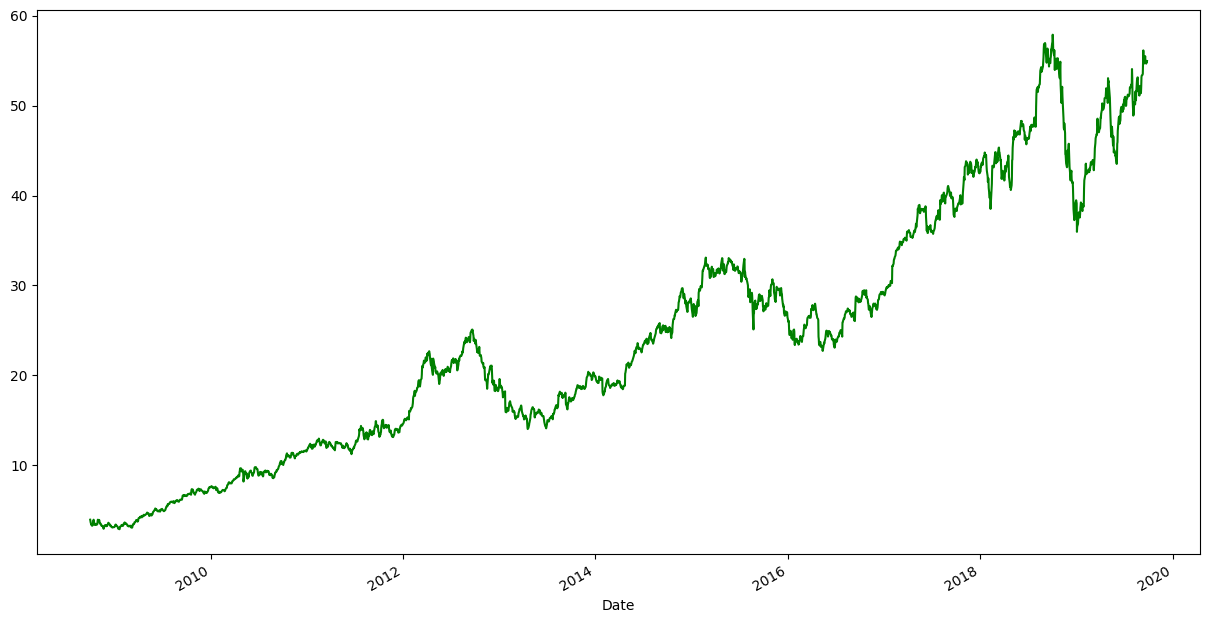

In [15]:
dataset_for_prediction['Mean'].plot(color='green', figsize=(15, 8))

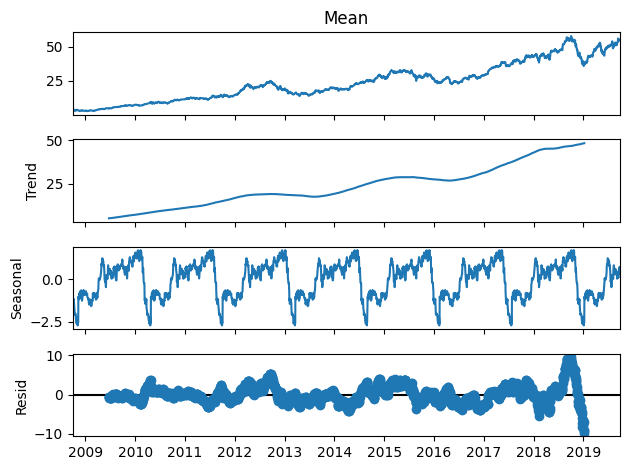

In [16]:
import statsmodels.api as sm
sd = sm.tsa.seasonal_decompose(dataset_for_prediction['Mean'], model='add', period= 365);

fig = sd.plot()
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

sc_in = MinMaxScaler(feature_range=(0,1))
scaler_input = sc_in.fit_transform(dataset_for_prediction[['Low', 'High', 'Open', 'Close', 'Volume', 'Adj Close', 'Mean']])
scaler_input = pd.DataFrame(scaler_input)
X = scaler_input

In [18]:
sc_in = MinMaxScaler(feature_range=(0,1))
scaler_output = sc_in.fit_transform(dataset_for_prediction[['Actual']])
scaler_output = pd.DataFrame(scaler_output)
y = scaler_output

In [19]:
X.rename(columns={0:'Low',
                  1: 'High',
                  2: 'Open',
                  3: 'Volume',
                  4: 'Adj Close',
                  5: 'Mean'}, inplace=True)
X.index=dataset_for_prediction.index

X.head(2)

,Low,High,Open,Volume,Adj Close,Mean,6
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.01762,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.01248,0.015763


In [20]:
y.rename(columns={0:'Preco_acao'}, inplace=True)
y.index = dataset_for_prediction.index

y.head(2)

,Preco_acao
Date,
2008-10-01,0.015763
2008-10-02,0.013284


In [26]:
train_size = int(len(dataset) * 0.7)
test_size = int(len(dataset)) - train_size
train_X, train_y = X[: train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [22]:
!pip install pmdarima scipy

In [23]:
!pip install scipy

In [24]:
from pmdarima.arima import auto_arima

In [28]:
step_wise = auto_arima(train_y,
                       exogenous=train_X,
                       start_p=1,
                       start_q=1,
                       max_p=7,
                       max_q=7,
                       d=1,
                       max_d=7,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15130.709, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15077.042, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15127.374, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15132.095, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15075.928, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15130.986, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15130.275, Time=2.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15131.797, Time=0.54 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.648 seconds


In [29]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1936
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7569.047
Date:                Thu, 15 Aug 2024   AIC                         -15132.095
Time:                        21:02:53   BIC                         -15115.391
Sample:                             0   HQIC                        -15125.952
                               - 1936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.414      0.157    -7.4e-05       0.000
ma.L1          0.1723      0.013     13.155      0.000       0.147       0.198
sigma2      2.339e-05   3.08e-07     75.974      0.000    2.28e-05     2.4e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9198.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_y,
                exog=train_X,
                order=(0, 1, 1),
                enforce_invertibility=False,
                enforce_stationarity=False)

In [32]:
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
predicoes = results.predict(start=train_size, end=train_size+test_size+(steps)-1, exog=test_X)

In [37]:
act = pd.DataFrame(scaler_output.iloc[train_size:])
act.index = test_X.index

In [38]:
predicoes = pd.DataFrame(predicoes)
predicoes.reset_index(drop=True, inplace=True)
predicoes.index=test_X.index
predicoes['Actual'] = act['Preco_acao']
predicoes.rename(columns={0: 'Pred'}, inplace=True)

<Axes: xlabel='Date'>

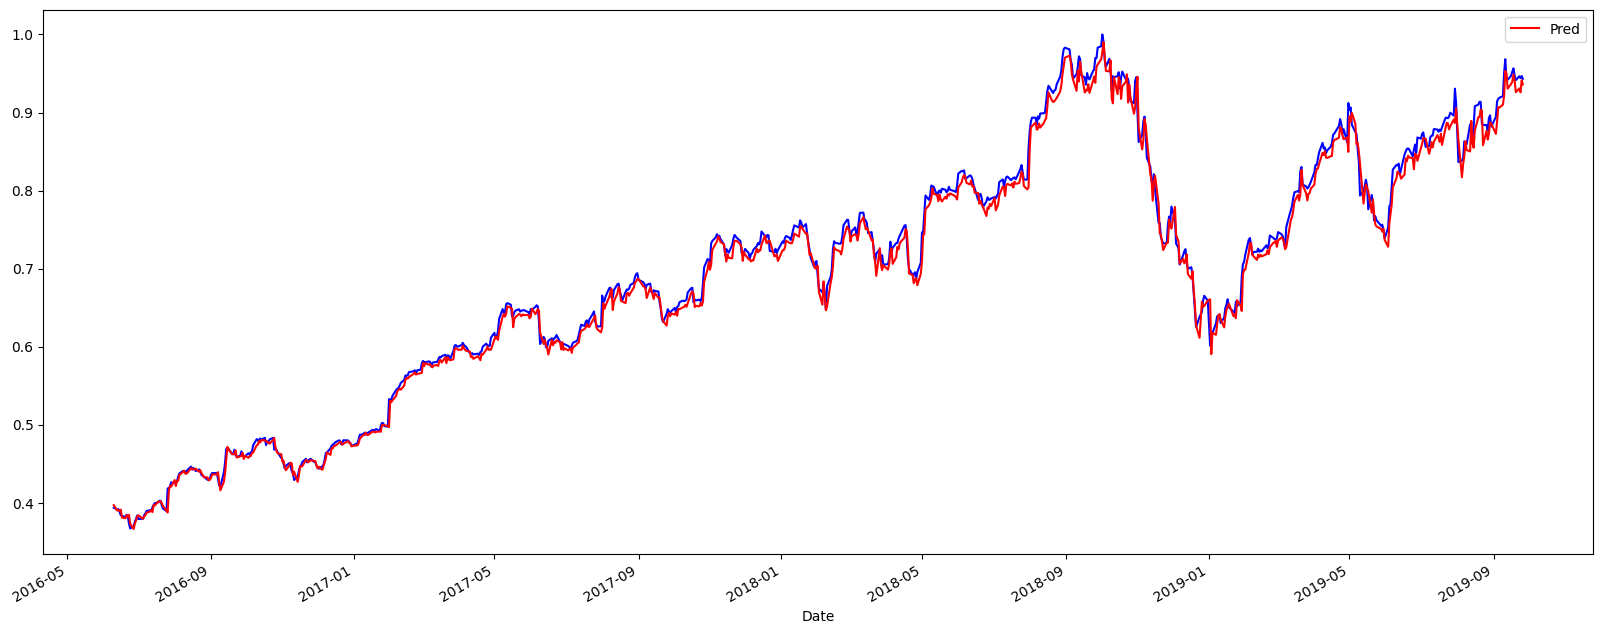

In [39]:
predicoes['Actual'].plot(figsize=(15, 8), color='blue')
predicoes['Pred'].plot(legend=True, color='red', figsize=(20, 8))

In [43]:
from statsmodels.tools.eval_measures import mse

error = mse(predicoes['Pred'], predicoes['Actual'])
print('MSE:', error)

MSE: 0.00013821411633853532
